In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('filtered_data.csv')

/tmp/ipykernel_676481/751481967.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('filtered_data.csv')


For introduction: Scatter plot area wise for most common crime categories

/tmp/ipykernel_706584/3482913332.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


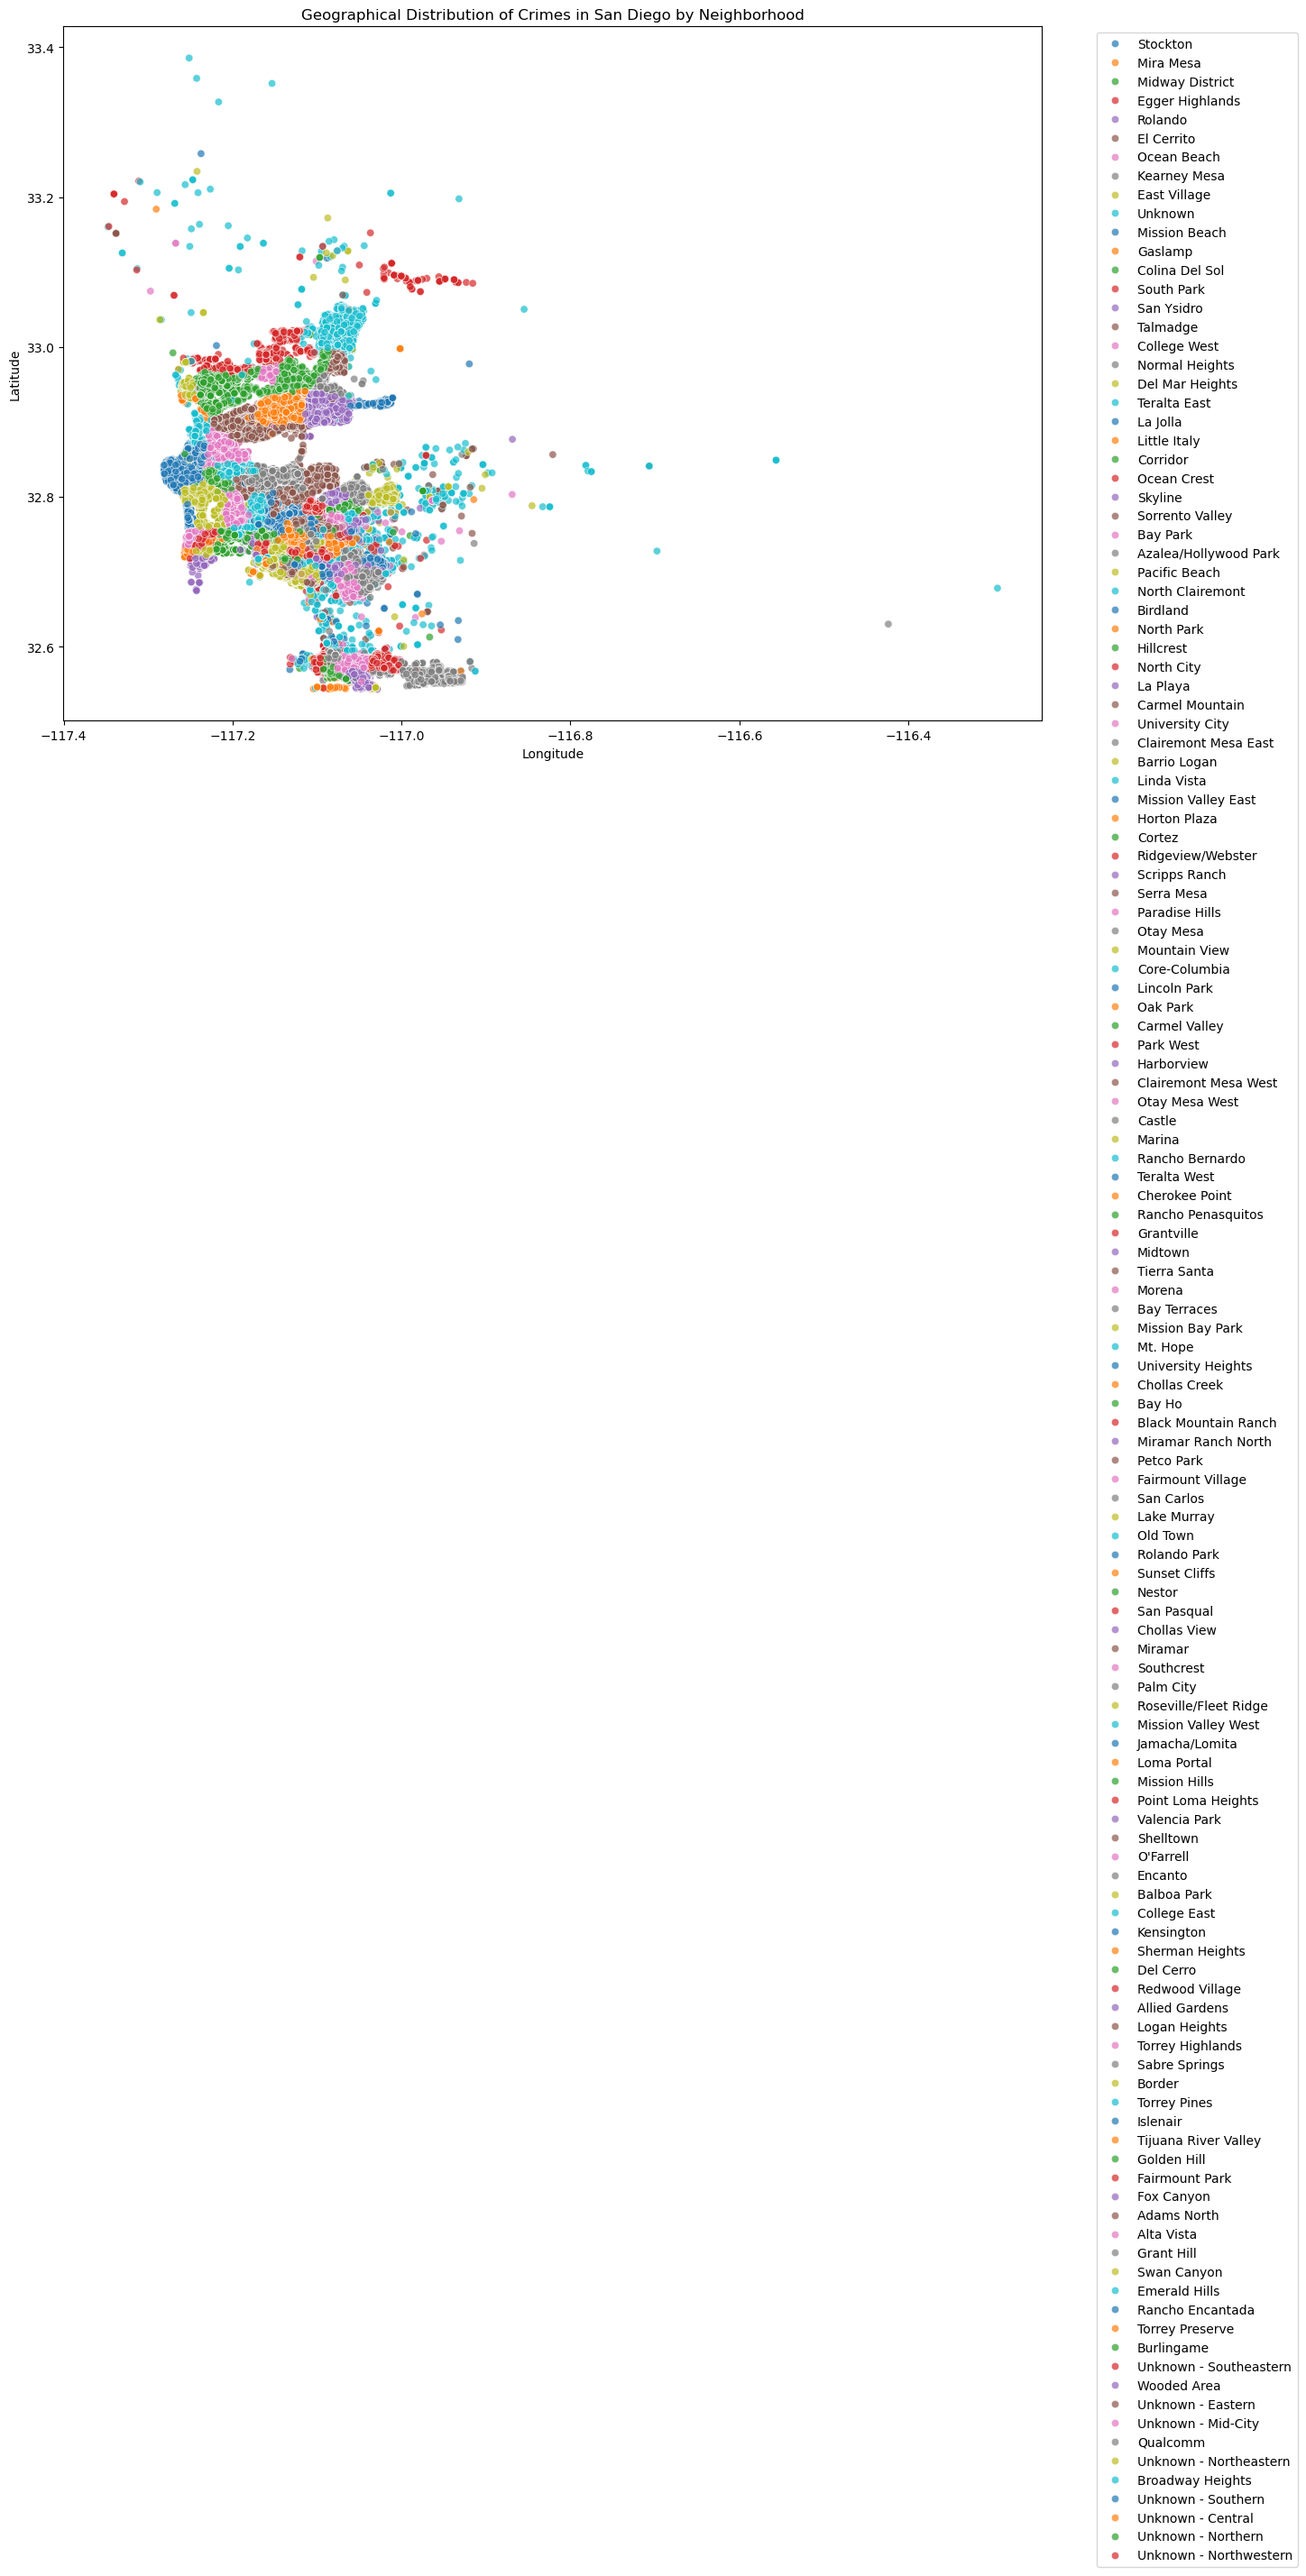

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'filtered_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Filter necessary columns
data = data[['latitude', 'longitude', 'neighborhood', 'ibr_offense_description']]

# Drop rows with missing coordinates or neighborhood data
data = data.dropna(subset=['latitude', 'longitude', 'neighborhood'])

# Plot the geographical distribution of crimes categorized by neighborhood
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='neighborhood',
    data=data,
    palette='tab10',
    alpha=0.7,
    legend='full'
)
plt.title('Geographical Distribution of Crimes in San Diego by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1. Temporal Trend Analysis


Goal: Examine how crime rates changed over time during and after COVID-19.

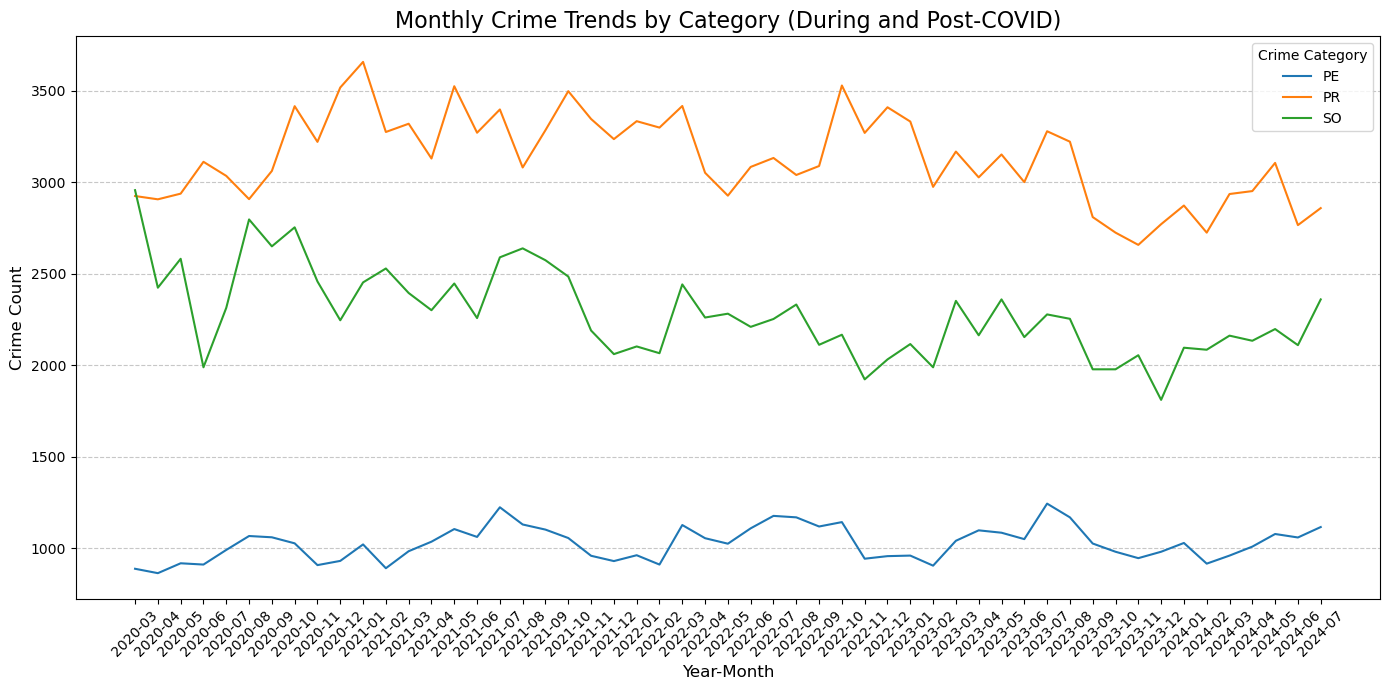

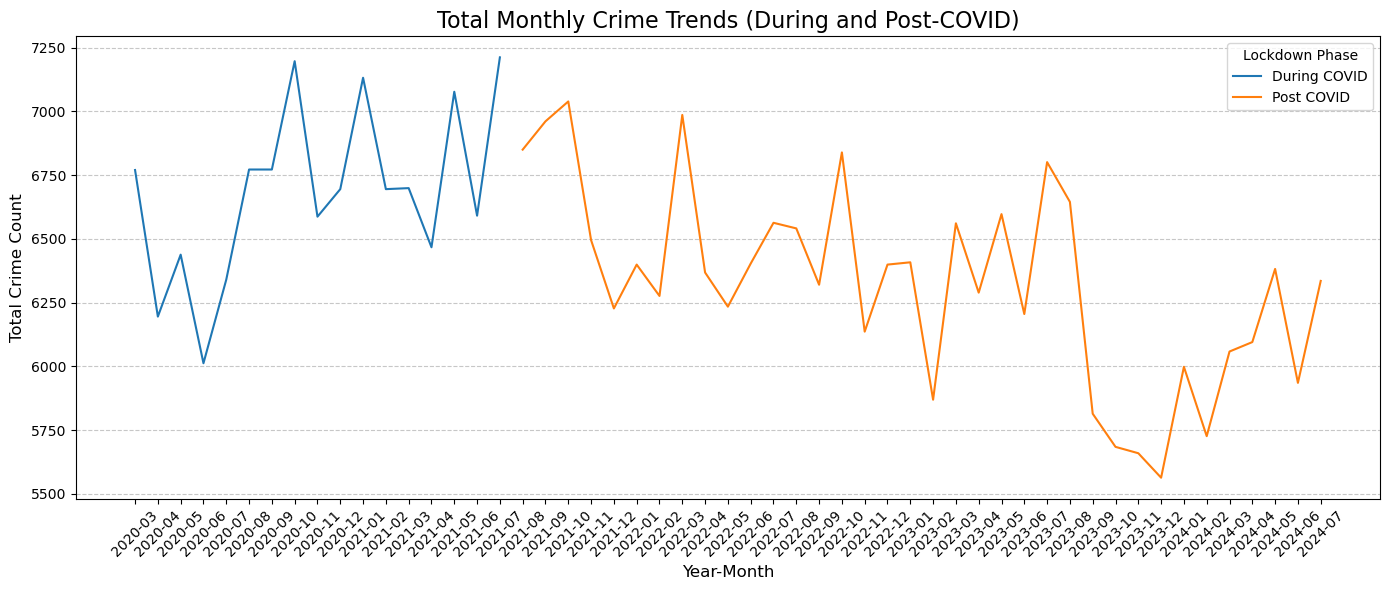

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'filtered_data.csv'  # Replace with your file path
data = pd.read_csv(file_path, parse_dates=['occured_on'], low_memory=False)

# Ensure 'year_month' is created from the 'occured_on' column
data['year_month'] = data['occured_on'].dt.to_period('M')

# Filter data strictly for valid time range
data = data[(data['year_month'] >= pd.Period('2020-03')) & (data['year_month'] <= pd.Period('2024-07'))]

# Define lockdown phase
data['lockdown_phase'] = data['year_month'].apply(
    lambda x: 'During COVID' if pd.Period('2020-03') <= x <= pd.Period('2021-07') else 'Post COVID'
)

# Aggregate monthly crime counts by lockdown phase and crime category
monthly_trends = data.groupby(['year_month', 'lockdown_phase', 'crime_against']).size().reset_index(name='crime_count')

# Sort year_month to ensure proper chronological order
monthly_trends = monthly_trends.sort_values('year_month')

# Pivot the data for easier visualization
trend_pivot = monthly_trends.pivot(index='year_month', columns='crime_against', values='crime_count').fillna(0)

# Plot line charts for each crime category
plt.figure(figsize=(14, 7))
for column in trend_pivot.columns:
    plt.plot(trend_pivot.index.astype(str), trend_pivot[column], label=column)

plt.title('Monthly Crime Trends by Category (During and Post-COVID)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Crime Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Total crime trends grouped by lockdown phase
monthly_total = monthly_trends.groupby(['year_month', 'lockdown_phase'])['crime_count'].sum().reset_index()

# Ensure year_month is sorted correctly
monthly_total = monthly_total.sort_values('year_month')

# Plot total crime trends
plt.figure(figsize=(14, 6))
for phase in monthly_total['lockdown_phase'].unique():
    phase_data = monthly_total[monthly_total['lockdown_phase'] == phase]
    plt.plot(phase_data['year_month'].astype(str), phase_data['crime_count'], label=phase)

plt.title('Total Monthly Crime Trends (During and Post-COVID)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Lockdown Phase')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


: 

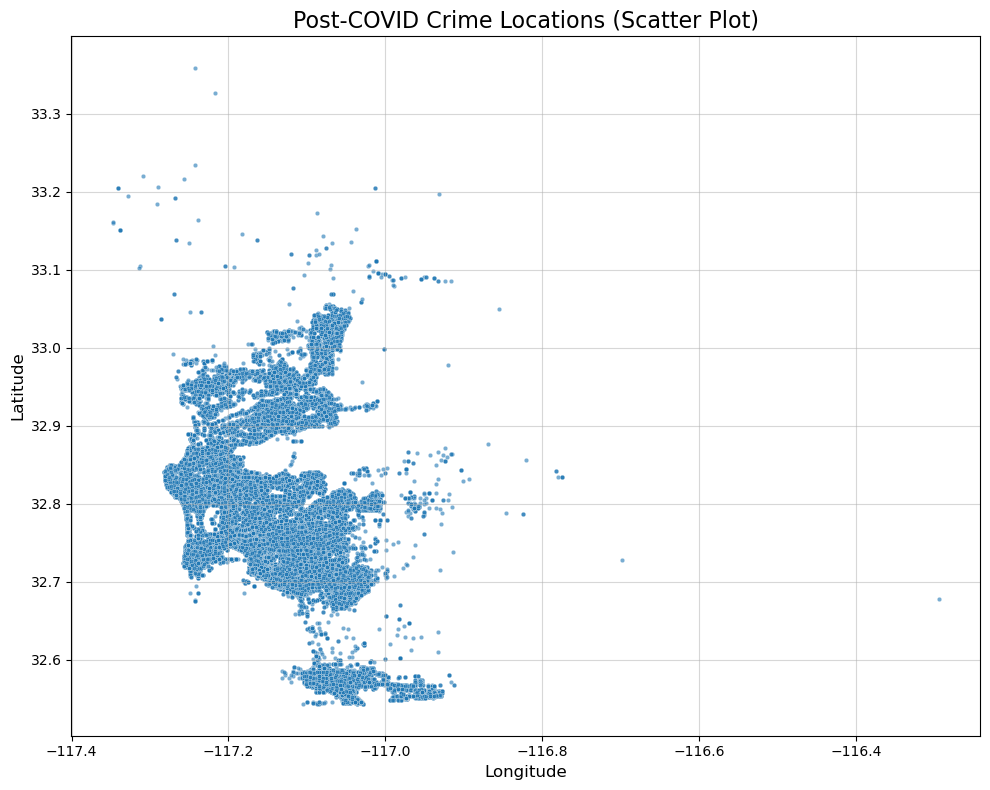

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the dataset
file_path = 'filtered_data.csv'  # Replace with your file path
data = pd.read_csv(file_path, parse_dates=['occured_on'], low_memory=False)

# Filter Post-COVID data
data['year_month'] = data['occured_on'].dt.to_period('M')
post_covid_data = data[data['year_month'] > pd.Period('2021-07')]

# Ensure valid latitude and longitude
post_covid_data = post_covid_data.dropna(subset=['latitude', 'longitude'])

# Plot a scatter plot of crime locations
plt.figure(figsize=(10, 8))
sns.scatterplot(x=post_covid_data['longitude'], y=post_covid_data['latitude'], alpha=0.6, s=10)
plt.title('Post-COVID Crime Locations (Scatter Plot)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Clustering with DBSCAN for Hotspot Identification
coords = post_covid_data[['latitude', 'longitude']].values
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
post_covid_data['cluster'] = db.labels_

# Plot Hotspots with Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=post_covid_data['longitude'], y=post_covid_data['latitude'], hue=post_covid_data['cluster'], palette='viridis', s=10, alpha=0.8)
plt.title('Post-COVID Crime Hotspots (Clustered)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_706584/3794244598.py:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):
/tmp/ipykernel_706584/3794244598.py:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):


Mean Squared Error: 262599.5825000001
R-squared: 0.9208741693149329


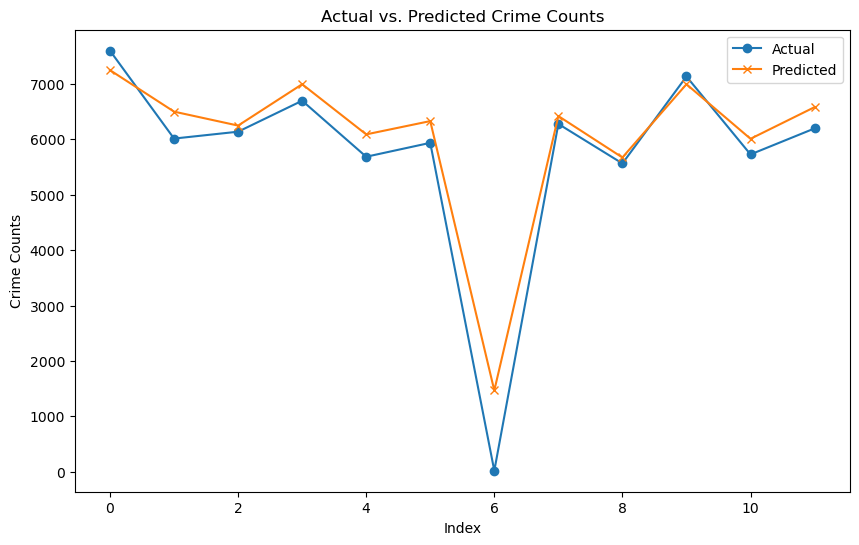

Feature Importances:
           Feature  Importance
1            month    0.592735
0             year    0.400395
2  lockdown_status    0.006869


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset in chunks
file_path = 'filtered_data.csv'
chunk_size = 100000

# Initialize an empty DataFrame for aggregated data
crime_data = pd.DataFrame()

# Process the file in chunks
for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size):
    # Extract month and year
    chunk['year_month'] = chunk['occured_on'].dt.to_period('M')
    # Group by month and count crimes
    monthly_data = chunk.groupby('year_month').size().reset_index(name='crime_count')
    crime_data = pd.concat([crime_data, monthly_data], ignore_index=True)

# Aggregate crime counts across chunks
crime_data = crime_data.groupby('year_month').sum().reset_index()
crime_data['year_month'] = crime_data['year_month'].astype(str)
crime_data['year_month'] = pd.to_datetime(crime_data['year_month'])

# Define lockdown status
crime_data['lockdown_status'] = np.where(
    (crime_data['year_month'] >= '2020-03') & (crime_data['year_month'] <= '2021-06'), 1, 0
)

# Create time-related features
crime_data['year'] = crime_data['year_month'].dt.year
crime_data['month'] = crime_data['year_month'].dt.month

# Prepare the data for modeling
X = crime_data[['year', 'month', 'lockdown_status']]
y = crime_data['crime_count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.legend()
plt.title('Actual vs. Predicted Crime Counts')
plt.xlabel('Index')
plt.ylabel('Crime Counts')
plt.show()

# Analyze feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)





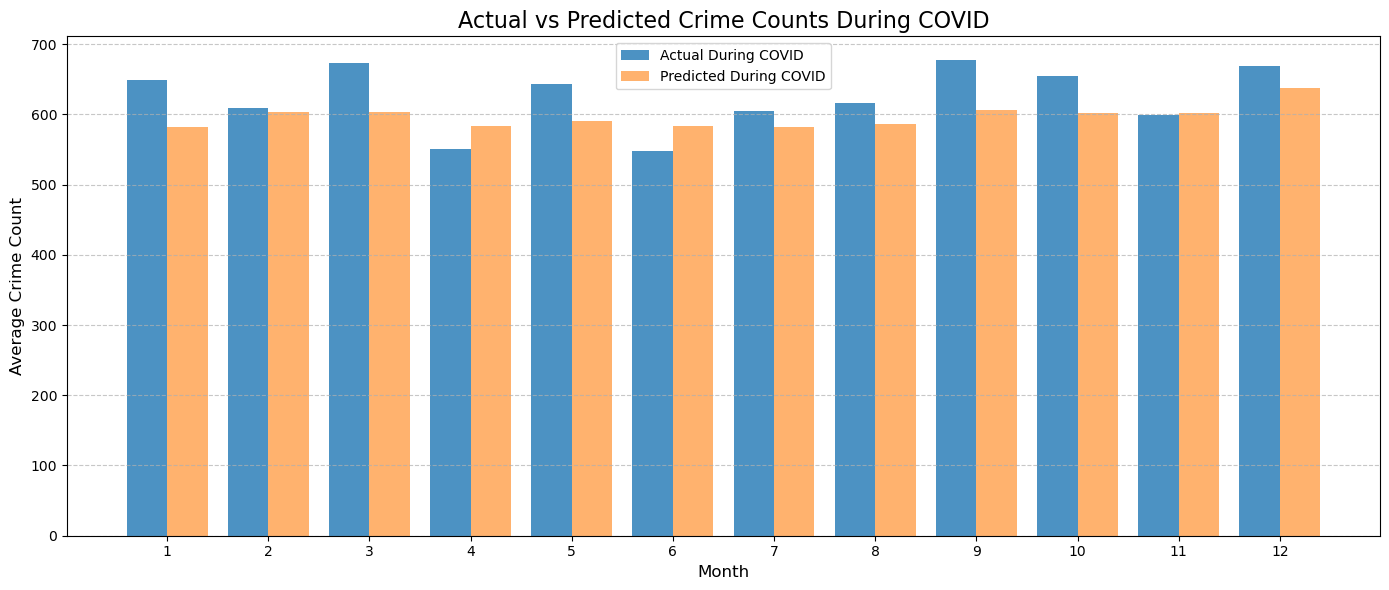

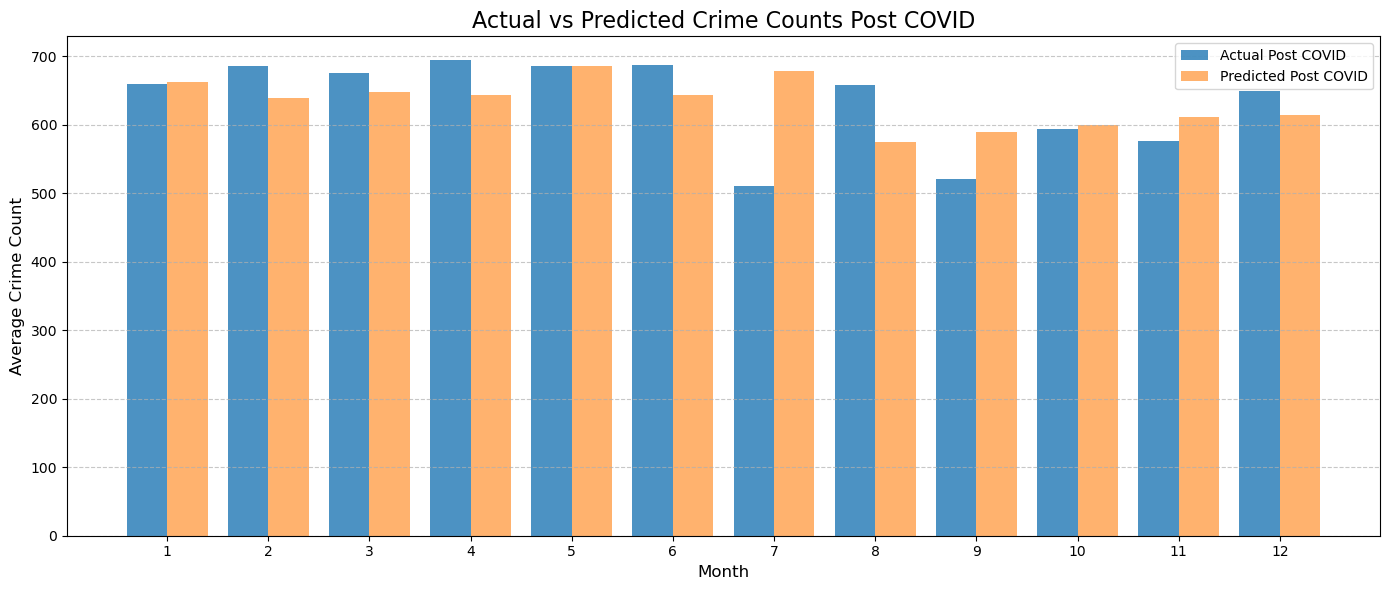

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the processed dataset with actual and predicted crime counts
processed_file_path = 'predicted_crime_counts.csv'  # Replace with your file path
data = pd.read_csv(processed_file_path)

# Aggregate actual and predicted crime counts by lockdown_phase and month
month_analysis = data.groupby(['lockdown_phase', 'month'])[['crime_count', 'predicted_crime_count']].mean().reset_index()

# Filter data for during and post COVID
during_covid = month_analysis[month_analysis['lockdown_phase'] == 'During COVID']
post_covid = month_analysis[month_analysis['lockdown_phase'] == 'Post COVID']

# Plot 1: Actual vs Predicted Crime Counts During COVID
plt.figure(figsize=(14, 6))
bar_width = 0.4
r1 = range(1, 13)

# Plot actual and predicted counts for During COVID
plt.bar(r1, during_covid['crime_count'], width=bar_width, label='Actual During COVID', alpha=0.8)
plt.bar([x + bar_width for x in r1], during_covid['predicted_crime_count'], width=bar_width, label='Predicted During COVID', alpha=0.6)

# Customize chart
plt.title('Actual vs Predicted Crime Counts During COVID', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Crime Count', fontsize=12)
plt.xticks([x + bar_width / 2 for x in r1], during_covid['month'], fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Actual vs Predicted Crime Counts Post COVID
plt.figure(figsize=(14, 6))
r2 = range(1, 13)

# Plot actual and predicted counts for Post COVID
plt.bar(r2, post_covid['crime_count'], width=bar_width, label='Actual Post COVID', alpha=0.8)
plt.bar([x + bar_width for x in r2], post_covid['predicted_crime_count'], width=bar_width, label='Predicted Post COVID', alpha=0.6)

# Customize chart
plt.title('Actual vs Predicted Crime Counts Post COVID', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Crime Count', fontsize=12)
plt.xticks([x + bar_width / 2 for x in r2], post_covid['month'], fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.2s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.2s
[CV] END regressor__learning_rate=0.01, re

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


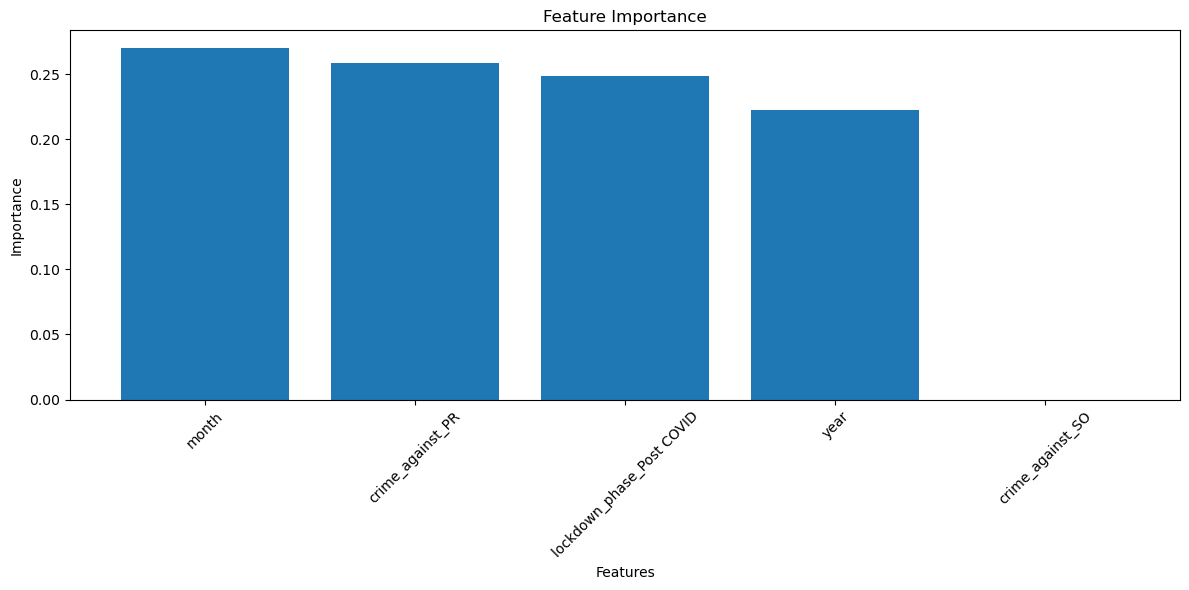

Predictions saved to 'predicted_crime_counts.csv'


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

# Load the processed dataset
processed_file_path = 'processed_data_with_lockdown.csv'  # Path to the processed file
data = pd.read_csv(processed_file_path)

# Features and Target
X = data[['month', 'year', 'lockdown_phase', 'crime_against']]
y = data['crime_count']

# One-Hot Encoding for Categorical Features and Scaling for Numerical Features
categorical_features = ['lockdown_phase', 'crime_against']
numerical_features = ['month', 'year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Advanced Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)

# Best Model and Parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Train-Test Split for Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Best Model on Training Data
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Model Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

# Feature Importance (from Gradient Boosting Model)
feature_importance = best_model.named_steps['regressor'].feature_importances_

# Get feature names for numerical and categorical columns
numerical_feature_names = numerical_features
categorical_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine feature names
feature_names = list(categorical_feature_names) + numerical_feature_names

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add Predictions to Data for Further Analysis
data['predicted_crime_count'] = best_model.predict(X)

# Save Predictions for Reporting
data.to_csv('predicted_crime_counts.csv', index=False)

print("Predictions saved to 'predicted_crime_counts.csv'")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.0s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.1s
[CV] END regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.1s
[CV] END regressor__learning_rate=0.01, re

/tmp/ipykernel_706584/3470679039.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


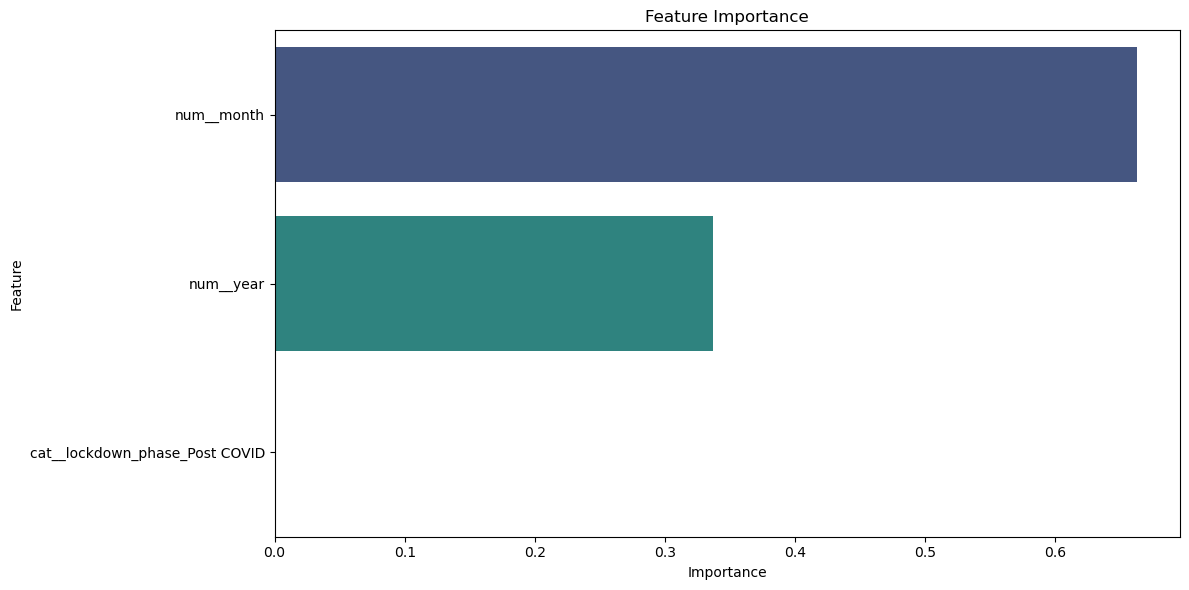

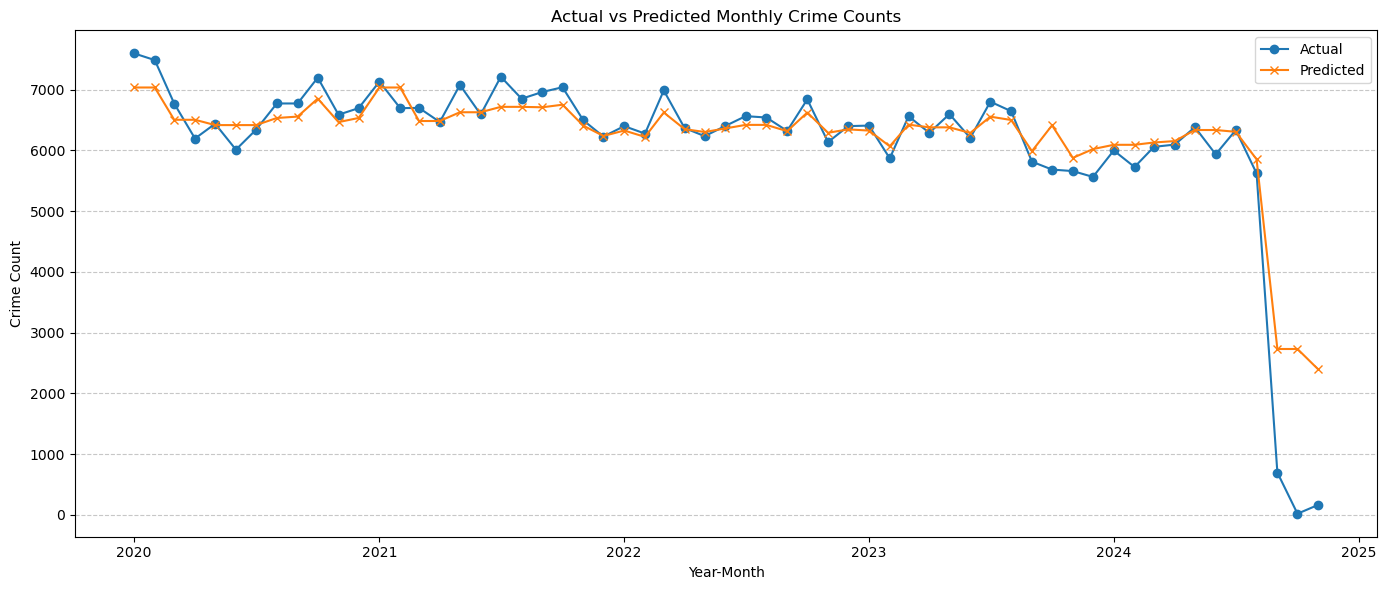

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in chunks for memory efficiency
file_path = 'filtered_data.csv'  # Replace with your actual path
chunk_size = 100000

# Initialize an empty DataFrame for aggregated data
crime_data = pd.DataFrame()

# Process the dataset in chunks
for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size, low_memory=False):
    chunk['year_month'] = chunk['occured_on'].dt.to_period('M')
    monthly_data = chunk.groupby('year_month').size().reset_index(name='crime_count')
    crime_data = pd.concat([crime_data, monthly_data], ignore_index=True)

# Aggregate crime counts across all chunks
crime_data = crime_data.groupby('year_month').sum().reset_index()
crime_data['year_month'] = pd.to_datetime(crime_data['year_month'].astype(str))

# Define lockdown phase
crime_data['lockdown_phase'] = np.where(
    (crime_data['year_month'] >= '2020-03') & (crime_data['year_month'] <= '2021-07'), 'During COVID', 'Post COVID'
)

# Extract time-related features
crime_data['year'] = crime_data['year_month'].dt.year
crime_data['month'] = crime_data['year_month'].dt.month

# Prepare feature matrix and target variable
X = crime_data[['year', 'month', 'lockdown_phase']]
y = crime_data['crime_count']

# Encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'month']),
        ('cat', OneHotEncoder(drop='first'), ['lockdown_phase'])
    ]
)

# Define Gradient Boosting model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse)}')
print(f'R-squared (R²): {r2}')

# Feature importance
feature_importance = best_model.named_steps['regressor'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out(['year', 'month', 'lockdown_phase'])
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Add predictions to the dataset
crime_data['predicted_crime_count'] = best_model.predict(X)

# Save predictions
crime_data.to_csv('predicted_crime_counts.csv', index=False)

# Plot actual vs predicted trends
plt.figure(figsize=(14, 6))
plt.plot(crime_data['year_month'], crime_data['crime_count'], label='Actual', marker='o')
plt.plot(crime_data['year_month'], crime_data['predicted_crime_count'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Monthly Crime Counts')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Geographic Hotspot Analysis

    latitude   longitude lockdown_phase  crime_count
0  32.543202 -117.028750   During COVID            1
1  32.543222 -117.028601     Post COVID            1
2  32.543596 -117.104285     Post COVID            1
3  32.543658 -117.086362     Post COVID            1
4  32.543766 -117.034486     Post COVID            1


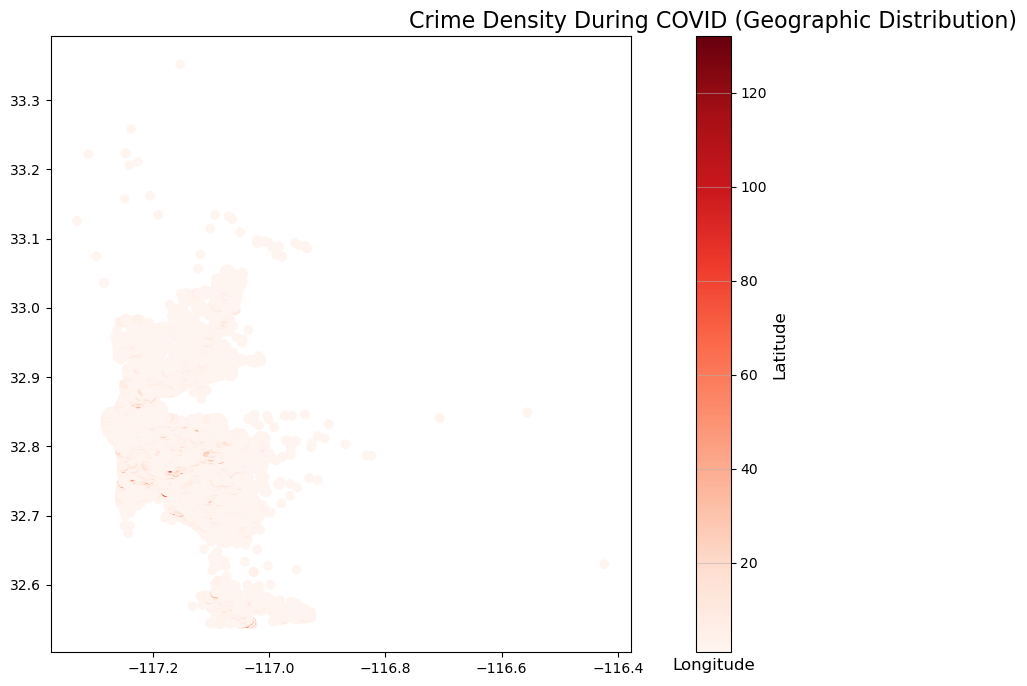

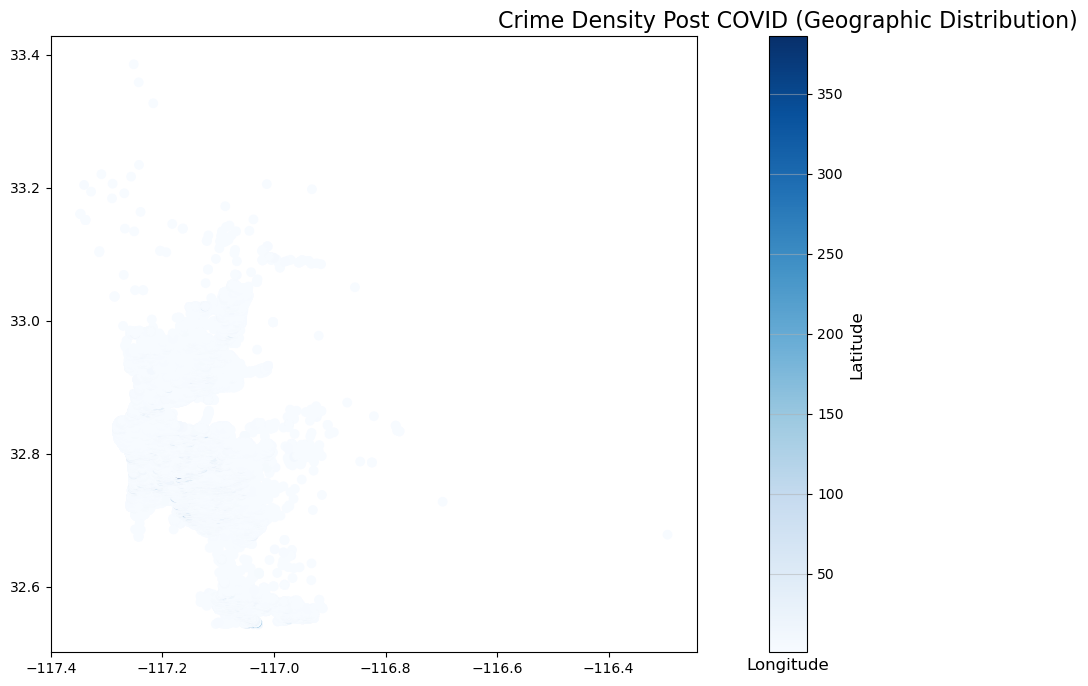

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the dataset
file_path = 'filtered_data.csv'
chunk_size = 100000

# Initialize an empty DataFrame for processed data
crime_data = pd.DataFrame()

# Define lockdown period
LOCKDOWN_START = pd.Timestamp('2020-03-01')
LOCKDOWN_END = pd.Timestamp('2021-07-31')

# Process the file in chunks
for chunk in pd.read_csv(file_path, parse_dates=['occured_on'], chunksize=chunk_size, low_memory=False):
    # Ensure 'occured_on' is in datetime format
    chunk['occured_on'] = pd.to_datetime(chunk['occured_on'], errors='coerce')
    chunk = chunk.dropna(subset=['occured_on'])  # Drop rows with invalid dates

    # Define lockdown phase
    chunk['lockdown_phase'] = np.where(
        (chunk['occured_on'] >= LOCKDOWN_START) & (chunk['occured_on'] <= LOCKDOWN_END),
        'During COVID',
        'Post COVID'
    )
    
    # Use latitude and longitude for geographic grouping
    chunk_grouped = chunk.groupby(['latitude', 'longitude', 'lockdown_phase']).size().reset_index(name='crime_count')
    crime_data = pd.concat([crime_data, chunk_grouped], ignore_index=True)

# Save processed data for visualization
crime_data.to_csv('processed_geographic_data.csv', index=False)
print(crime_data.head())

# Visualization: Heatmap
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    crime_data, 
    geometry=gpd.points_from_xy(crime_data.longitude, crime_data.latitude),
    crs="EPSG:4326"
)

# Plot heatmap for "During COVID"
plt.figure(figsize=(12, 8))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

during_covid = gdf[gdf['lockdown_phase'] == 'During COVID']
during_covid.plot(column='crime_count', cmap='Reds', ax=ax, legend=True, cax=cax)
plt.title('Crime Density During COVID (Geographic Distribution)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Plot heatmap for "Post COVID"
plt.figure(figsize=(12, 8))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

post_covid = gdf[gdf['lockdown_phase'] == 'Post COVID']
post_covid.plot(column='crime_count', cmap='Blues', ax=ax, legend=True, cax=cax)
plt.title('Crime Density Post COVID (Geographic Distribution)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


In [16]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.
